In [1]:
from corespray import corespraydf
from galpy.potential import MWPotential2014
from galpy.util import conversion
from galpy.orbit import Orbit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import seaborn as sns

from IPython.display import HTML
%matplotlib inline

In [2]:
o=Orbit.from_name('M3')

In [3]:
ts=np.linspace(0,1,1000)
o.integrate(ts,MWPotential2014)
print(o.Tp(),o.Tr())

0.3787798594866931 0.24862258502956833


In [4]:
ro,vo=8.,220.
to=conversion.time_in_Gyr(ro=ro,vo=vo)*1000.


In [5]:
#Globular Cluster NGC 6397
gcname='NGC6397'
mu0=0.
sig0=5.3
vesc0=21.1
logrho0=6.41
rho0=10.0**6.41

mgc=1.0e5
rgc=3.
W0=5.

mmin=0.1
mmax=1.4
alpha=-1

In [6]:
cspray=corespraydf(gcname,MWPotential2014,mu0,sig0,vesc0,rho0,mgc,rgc,W0,mmin,mmax,alpha,verbose=True)

Sample Binary Energies between:  6.957269723287709e+36  and  1.1769172519116398e+40  J


In [7]:
#Sample nstar stars for the distribution function
#Set binary = True if you want to keep track of binary kicks
os=cspray.sample(1000,nstar=100,binaries=True,verbose=True)

DEBUG:  1 0.9947152885538486 [31.2958812] 21.1
DEBUG:  1 0.2126173326562165 [6.83723825] 21.1
DEBUG:  1 0.22129286614398608 [1.56575664] 21.1
DEBUG:  1 0.6037552253852081 [5.5404295] 21.1
DEBUG:  2 0.15525062922365077 [25.24879104] 21.1
DEBUG:  2 0.4332952365777354 [16.20274403] 21.1
DEBUG:  2 0.5841767815053078 [1.27767092] 21.1
DEBUG:  3 0.7775400290527255 [22.32527982] 21.1
DEBUG:  3 0.050777973146804274 [16.60369573] 21.1
DEBUG:  3 0.2759111482384723 [18.10094525] 21.1
DEBUG:  3 0.9754510929868977 [8.16773578] 21.1
DEBUG:  3 0.9482331633641833 [12.73235155] 21.1
DEBUG:  3 0.601200989528618 [5.49997863] 21.1
DEBUG:  3 0.9706777263773464 [4.38262075] 21.1
DEBUG:  3 0.25292624078453996 [1.62239893] 21.1
DEBUG:  3 0.38091084259730706 [5.87630772] 21.1
DEBUG:  3 0.7737459634956422 [2.40367736] 21.1
DEBUG:  3 0.9781907501054117 [7.59539517] 21.1
DEBUG:  3 0.9400019320338828 [19.34404163] 21.1
DEBUG:  3 0.6615167686872603 [20.17779185] 21.1
DEBUG:  4 0.6706474881007748 [40.98083409] 21.1


In [8]:
#Bindx will tell you what binaries were given kicks that also resulted in escapeing the cluster
cspray.bindx

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False])

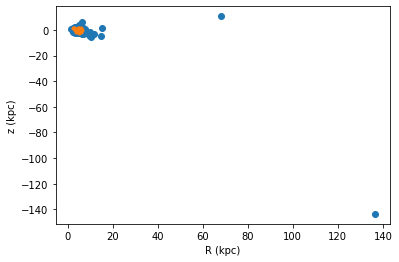

In [9]:
#Plot R and z of escaped stars and binaries
plt.plot(os.R(),os.z(),'o')
plt.plot(cspray.obf.R()[cspray.bindx],cspray.obf.z()[cspray.bindx],'.')

plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')

plt.show()

In [10]:
cspray.of.vz()-cspray.obf.vz()

array([  55.89138905,  168.16961235,   49.52848496,  118.99413998,
        244.44184656,  259.67255673,   12.46808441,   23.07340245,
         18.66878663,   -0.90486829,  191.62723573,   72.93694668,
         75.40971684, -147.91982164,  171.12991209,  136.06955344,
        169.82151619,  157.59793806,    8.38132531,  174.73750865,
        -10.98901467,  194.74092978,  352.67833111,   36.29315846,
        251.533858  ,  116.30551312,  239.74325427,  -59.91412602,
        263.9200386 ,  191.19092183,  258.29720739,  227.11459509,
        291.18137122,  299.1251145 ,  184.32210299,  174.34253814,
        104.63831734,  -17.2465383 ,  122.75569594,  319.21688246,
        130.9604799 ,  238.62991973,   80.67451736,    5.34256388,
         -3.80078296, -121.54273583,    8.00178928,  277.52487045,
         65.2069165 ,  197.81417921,   47.38693577,   15.96023188,
        178.06986849,   70.52798427,  182.28159394,  276.07737686,
        -27.05311563,  106.51335097,  204.84766255,  154.03974

Text(0, 0.5, 'Escape Velocity (km/s)')

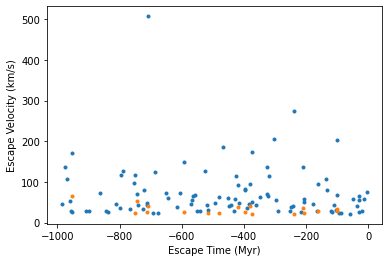

In [11]:
plt.plot(cspray.tesc,cspray.vesc,'.')
plt.plot(cspray.tesc[cspray.bindx],cspray.vescb[cspray.bindx],'.')

plt.xlabel('Escape Time (Myr)')
plt.ylabel('Escape Velocity (km/s)')

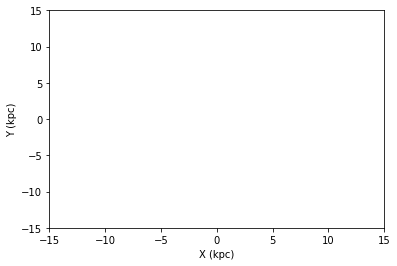

In [12]:
cspray.animate(frames=100,interval=50,xlim=(-15,15),ylim=(-15,15))

In [13]:
HTML(cspray.anim.to_jshtml())


In [14]:
cspray.snapout()

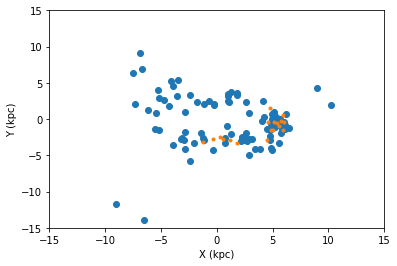

In [15]:
plt.plot(os.x(),os.y(),'o')
plt.plot(cspray.obf.x()[cspray.bindx],cspray.obf.y()[cspray.bindx],'.')

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.show()
plt.close()

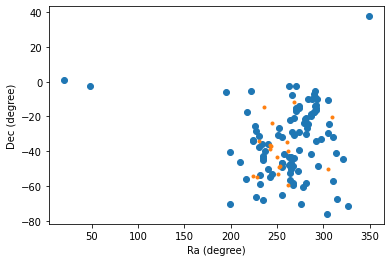

In [16]:
plt.plot(os.ra(),os.dec(),'o')
plt.plot(cspray.obf.ra()[cspray.bindx],cspray.obf.dec()[cspray.bindx],'.')

plt.xlabel('Ra (degree)')
plt.ylabel('Dec (degree)')
plt.show()
plt.close()

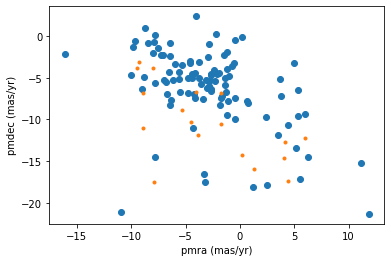

In [17]:
plt.plot(os.pmra(),os.pmdec(),'o')
plt.plot(cspray.obf.pmra()[cspray.bindx],cspray.obf.pmdec()[cspray.bindx],'.')

plt.xlabel('pmra (mas/yr)')
plt.ylabel('pmdec (mas/yr)')
plt.show()
plt.close()

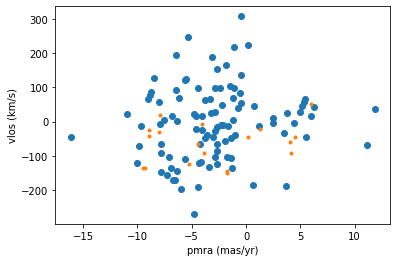

In [18]:
plt.plot(os.pmra(),os.vlos(),'o')
plt.plot(cspray.obf.pmra()[cspray.bindx],cspray.obf.vlos()[cspray.bindx],'.')

plt.xlabel('pmra (mas/yr)')
plt.ylabel('vlos (km/s)')
plt.show()
plt.close()

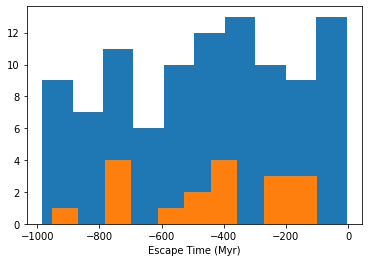

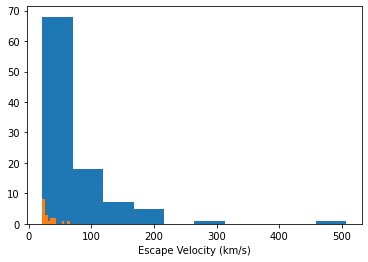

In [19]:
plt.hist(cspray.tesc)
plt.hist(cspray.tesc[cspray.bindx])

plt.xlabel('Escape Time (Myr)')
plt.show()
plt.close()

plt.hist(cspray.vesc)
plt.hist(cspray.vescb[cspray.bindx])
plt.xlabel('Escape Velocity (km/s)')
plt.show()
plt.close()

(0.0, 250.0)

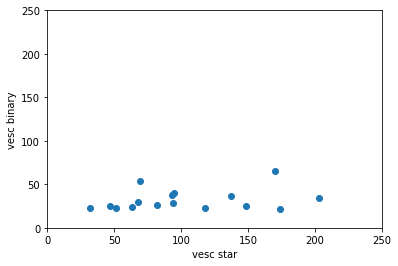

In [20]:
plt.plot(cspray.vesc[cspray.bindx],cspray.vescb[cspray.bindx],'o')
plt.xlabel('vesc star')
plt.ylabel('vesc binary')
plt.xlim(0,250)
plt.ylim(0,250)

In [21]:
((cspray.mb1+cspray.mb2)/cspray.mstar)[cspray.bindx]

array([ 3.29956391,  2.3687275 ,  3.14435234,  2.14358399,  4.41525085,
       13.04800371,  1.87378644,  5.78552236,  3.50041665, 13.41318682,
        2.78650107,  0.92171228,  2.49986049,  5.16953618,  9.18881353,
        7.53374908,  1.04248183,  1.89571999])

In [22]:
ts=np.linspace(0,1,1000)
os.integrate(ts,MWPotential2014)

jr,jp,jz=os.jr(),os.jp(),os.jz()


In [23]:
cspray.obf.integrate(ts,MWPotential2014)
jrb,jpb,jzb=cspray.obf.jr(),cspray.obf.jp(),cspray.obf.jz()


In [24]:
vindx=cspray.vesc<1.0e10

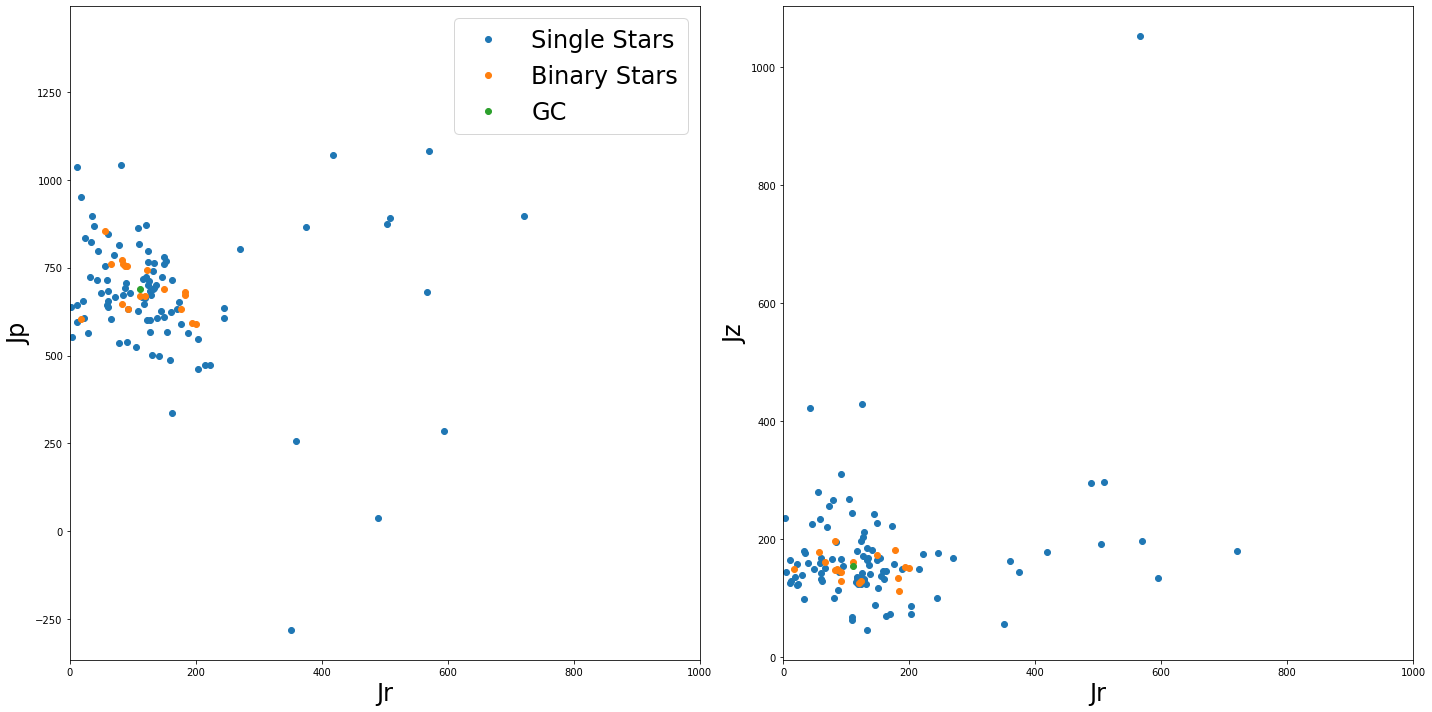

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.plot(jr[vindx],jp[vindx],'o',alpha=1,label='Single Stars')
plt.plot(jrb[cspray.bindx],jpb[cspray.bindx],'o',alpha=1,label='Binary Stars')

plt.plot(cspray.o.jr(),cspray.o.jp(),'o',label='GC')

plt.legend(fontsize=24)
plt.xlabel('Jr',fontsize=24)
plt.ylabel('Jp',fontsize=24)
plt.xlim(0,1000)

plt.subplot(1,2,2)

plt.plot(jr[vindx],jz[vindx],'o',alpha=1)
plt.plot(jrb[cspray.bindx],jzb[cspray.bindx],'o',alpha=1)

plt.plot(cspray.o.jr(),cspray.o.jz(),'o')

plt.xlabel('Jr',fontsize=24)
plt.ylabel('Jz',fontsize=24)

plt.xlim(0,1000)

plt.tight_layout()

plt.show()
plt.close()

In [26]:
jrb[cspray.bindx]

array([ 87.52019952, 149.3986406 , 193.86219575,  83.14571881,
       182.52774552, 183.69148631, 123.42487124,  56.84200285,
       120.25941487,  92.27376073,  17.75938387,  91.64876438,
        85.52217691,  66.25340381,  83.18530907, 111.67333897,
       200.55925588, 177.38378655])

In [27]:
np.sum(cspray.bindx),len(cspray.bindx)

(18, 100)

In [28]:
jpb[cspray.bindx]

array([754.8938355 , 688.33502619, 593.28658048, 645.78040455,
       680.02822341, 672.83424823, 743.13901422, 853.47026243,
       668.38979111, 632.44265904, 603.58511079, 754.45296454,
       760.72345295, 759.82166363, 770.51532897, 668.55255251,
       589.62383224, 631.89285299])

In [29]:
jzb[cspray.bindx]

array([147.17342368, 173.65171317, 153.23507406, 195.97418971,
       133.03542108, 111.77940073, 129.54473075, 177.35747931,
       125.86562785, 128.84614268, 149.89062181, 144.42467296,
       149.24216263, 160.43106785, 147.99942091, 161.48428704,
       150.14884994, 181.4293255 ])

In [30]:
cspray.obf.vx()[cspray.bindx]

array([ 69.28094689, 255.48560712,  85.06699546,  48.34051376,
       177.60956657, 234.63620734, 257.15390351, 143.40520009,
        13.9098166 , -84.83165003, 147.3084012 , 116.43168639,
        92.95521696, 125.24713085,  77.28133826, -17.5745618 ,
       187.77633961, 256.16222126])

In [31]:
cspray.obf.vy()[cspray.bindx]

array([ 123.07046488,  -22.64710703,   77.41181816,  110.16648987,
         37.40205034,  -52.80952485,    5.72849668,  133.6243044 ,
        109.55559956,  106.22847209, -104.49364946,  116.51884213,
        142.65254896,  153.79813621,  134.99776904,  110.48409359,
       -187.95458053,  -57.23603963])

In [32]:
cspray.obf.vz()[cspray.bindx]

array([-129.54205824,  139.00981209, -120.47207432, -101.64429058,
       -116.62932394,  -29.34952893, -172.48197814, -101.95832991,
        -82.85870157,   36.81238738,  167.05180961, -135.24200963,
       -139.86370902,  -95.75545107, -134.18100236, -124.21521417,
         52.28302985,  133.00146292])